# Exploratory Data Analysis of 10,000 Movies

The code below with show the code that was used to compute the many statistics about the dataset that was collected for this analysis.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/cleaned/cleaned_movies.csv')
df.head()

,#,title,release_date,original_language,popularity,vote_count,vote_average
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972


In [129]:
len(df)

9951

In [130]:
df.describe()

,#,popularity,vote_count,vote_average
count,9951.000000,9951.000000,9951.000000,9951.000000
mean,4990.870465,7.096713,1477.731384,5.565219
std,2886.267899,16.418277,3412.302452,2.391956
min,0.000000,2.616700,0.000000,0.000000
25%,2491.500000,4.502700,5.000000,5.200000
50%,4988.000000,4.981400,74.000000,6.300000
75%,7487.500000,6.176150,1189.000000,7.019000
max,9999.000000,1096.665400,38078.000000,10.000000


This notebook is using the cleaned version of the csv file. In the cleaning, any null values that existed dropped the entry. Null values were located only in the release date column and the overview column. Since the overview will not be needed for this analysis, that column was dropped before dropping the rows. After the cleaning, the csv remained with 49 less rows due to the lack of release dates which will be very important.

### Correlation Plots

In [131]:
%matplotlib inline

In [132]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df.head()

,#,title,release_date,original_language,popularity,vote_count,vote_average,release_year
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,2025
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,2025
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,2025
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,2025
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,2025


In [133]:
years = df.groupby('release_year').size()
years

release_year
1897      5
1898      1
1900      3
1902      3
1903      4
       ... 
2023    444
2024    619
2025    753
2026     25
2027      5
Length: 127, dtype: int64

In [134]:
decades = years.groupby(years.index // 10 * 10).sum()
decades

release_year
1890       6
1900      18
1910      70
1920      92
1930     153
1940     154
1950     230
1960     355
1970     495
1980     607
1990     874
2000    1514
2010    2602
2020    2781
dtype: int64

<Axes: title={'center': 'Number of Movies Released by Decade'}, xlabel='Decade', ylabel='Number of Movies'>

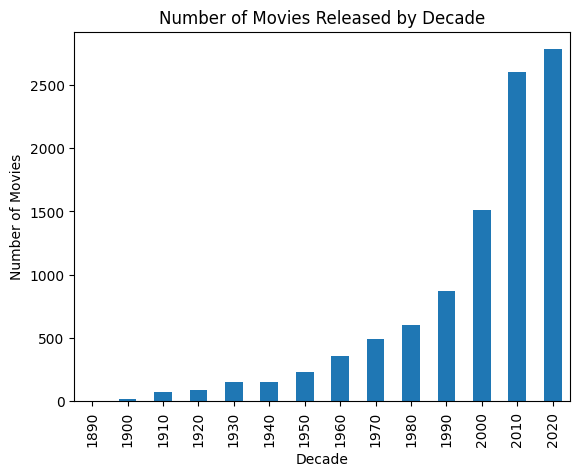

In [135]:
decades.plot(kind="bar", title="Number of Movies Released by Decade", xlabel="Decade", ylabel="Number of Movies")

<Axes: title={'center': 'Number of Movies Released by Year'}, xlabel='Year', ylabel='Number of Movies'>

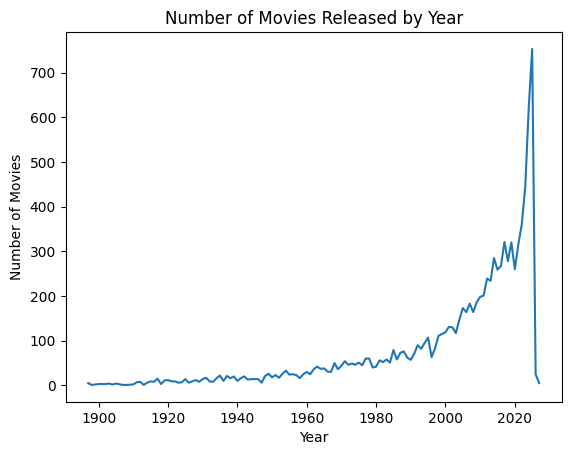

In [136]:
years.plot(kind="line", title="Number of Movies Released by Year", xlabel="Year", ylabel="Number of Movies")

In [137]:
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
df.head()

,#,title,release_date,original_language,popularity,vote_count,vote_average,release_year,release_month
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,2025,10
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,2025,10
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,2025,7
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,2025,7
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,2025,9


In [138]:
months = df.groupby('release_month').size()
months

release_month
1      998
2      596
3      823
4      697
5      721
6      819
7      748
8      782
9      956
10    1058
11     825
12     928
dtype: int64

<Axes: title={'center': 'Number of Movies Released by Month'}, xlabel='Month', ylabel='Number of Movies'>

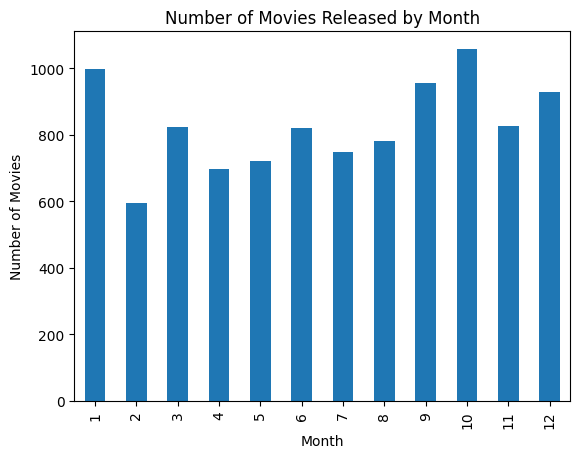

In [139]:
months.plot(kind="bar", title="Number of Movies Released by Month", xlabel="Month", ylabel="Number of Movies")

In [140]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.day
dates = df.groupby('release_date').size()
dates

release_date
1     876
2     281
3     308
4     271
5     276
6     287
7     303
8     299
9     290
10    331
11    312
12    340
13    307
14    316
15    346
16    321
17    351
18    310
19    336
20    335
21    310
22    315
23    324
24    287
25    343
26    283
27    304
28    304
29    249
30    269
31    167
dtype: int64

<Axes: title={'center': 'Number of Movies Released by Date'}, xlabel='Date', ylabel='Number of Movies'>

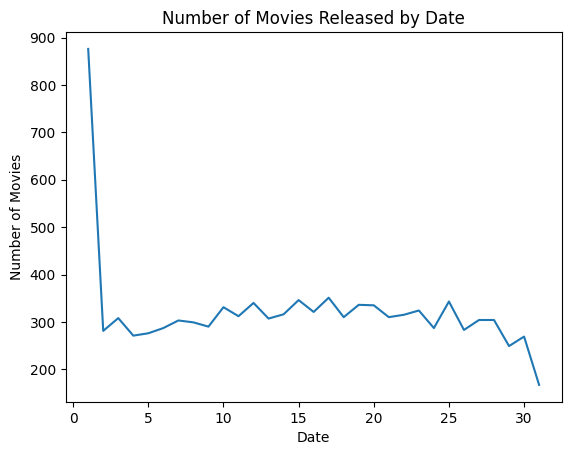

In [142]:
dates.plot(kind="line", title="Number of Movies Released by Date", xlabel="Date", ylabel="Number of Movies")

<Axes: title={'center': 'Top 10 Original Languages of Movies'}, xlabel='Language', ylabel='Number of Movies'>

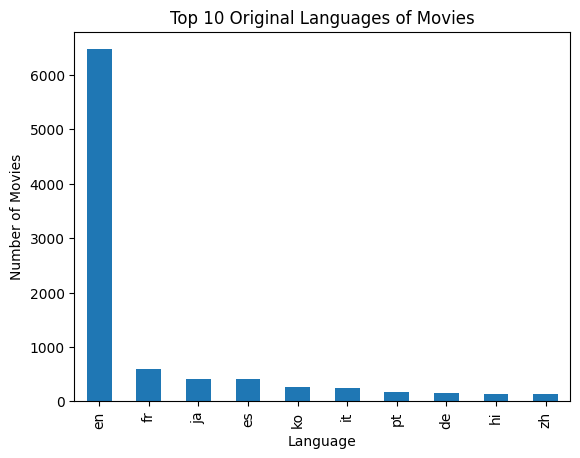

In [144]:
languages = df.groupby('original_language').size().sort_values(ascending=False)
languages.head(10).plot(kind="bar", title="Top 10 Original Languages of Movies", xlabel="Language", ylabel="Number of Movies")

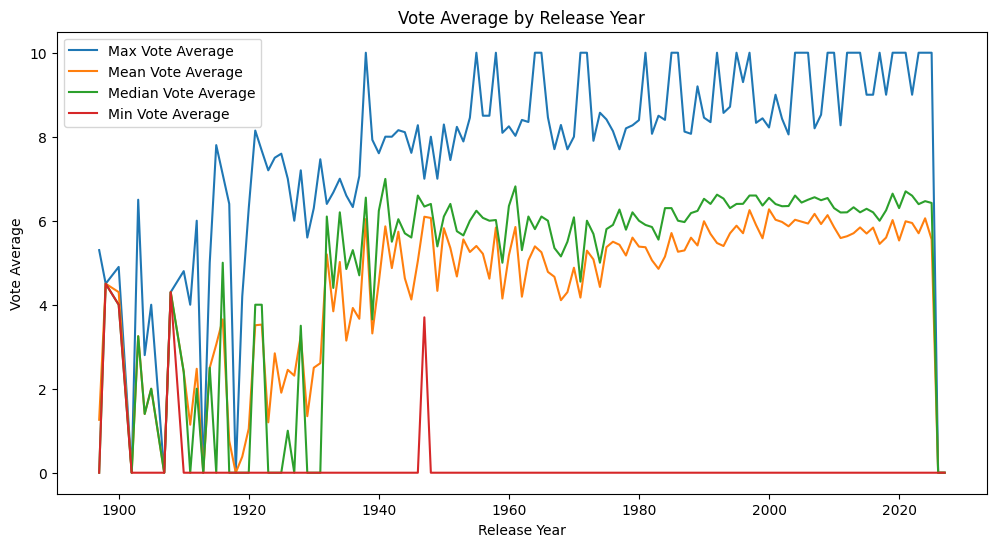

In [154]:
votes_max = df.groupby('release_year')['vote_average'].max()
votes_mean = df.groupby('release_year')['vote_average'].mean()
votes_median = df.groupby('release_year')['vote_average'].median()
votes_min = df.groupby('release_year')['vote_average'].min()
plt.figure(figsize=(12, 6))
plt.plot(votes_max.index, votes_max, label='Max Vote Average')
plt.plot(votes_mean.index, votes_mean, label='Mean Vote Average')
plt.plot(votes_median.index, votes_median, label='Median Vote Average')
plt.plot(votes_min.index, votes_min, label='Min Vote Average')
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.legend()
plt.show()


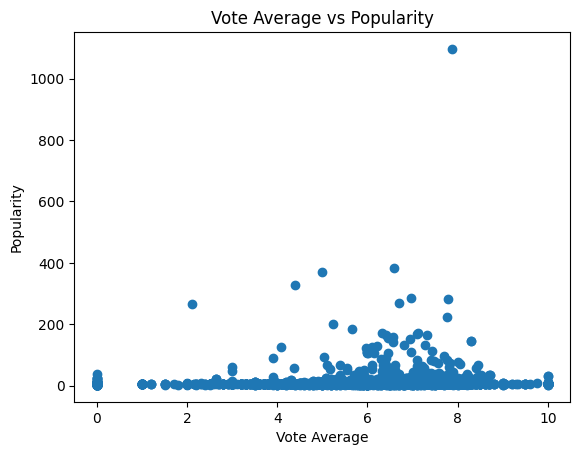

In [155]:
import matplotlib.pyplot as plt

x = df['vote_average']
y = df['popularity']

plt.scatter(x, y)
plt.title('Vote Average vs Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()